In [1]:
import platform
import os
import sys
import psutil 
import GPUtil
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import time
from datetime import datetime
import warnings
import sklearn
warnings.filterwarnings('ignore')

# Display scikit-learn version for compatibility reference
print(f"📦 Scikit-learn version: {sklearn.__version__}")
print(f"🐍 Python version: {sys.version.split()[0]}")
print("")

📦 Scikit-learn version: 1.4.1.post1
🐍 Python version: 3.11.5



🔍 K-MEANS CLUSTERING ANALYSIS - SINGLE THREAD MODE
⚙️  Configuration: Single-threaded execution for baseline performance
📝 Note: Multi-threading will be implemented in future versions
🔧 Threading Configuration:
   • Single Thread Mode: True
   • CPU cores available: 16
   • Note: Using default single-thread KMeans behavior

1. Loading Dataset...
✅ Dataset loaded successfully!
📊 Shape: (500000, 5)
💾 Memory usage: 19.07 MB
✅ Created new CSV file: perf_kmeans_clustering_training.csv
🚀 Performance Monitor Initialized
📁 Log file: perf_kmeans_clustering_training.csv
⏱️ Monitoring interval: 0.5s
📊 Max buffer size: 2000 records
🔔 Alert thresholds set: CPU>85%, Memory>90%, Disk>95%

3. Starting Performance Monitoring for Clustering...
🔄 Performance monitoring started at 2025-08-07 23:24:51
Press Ctrl+C to stop monitoring and save data

4. Data Preprocessing...
   Standardizing features...
✅ Preprocessing completed in 0.05 seconds

5. Finding Optimal Number of Clusters...
   Using random sample 

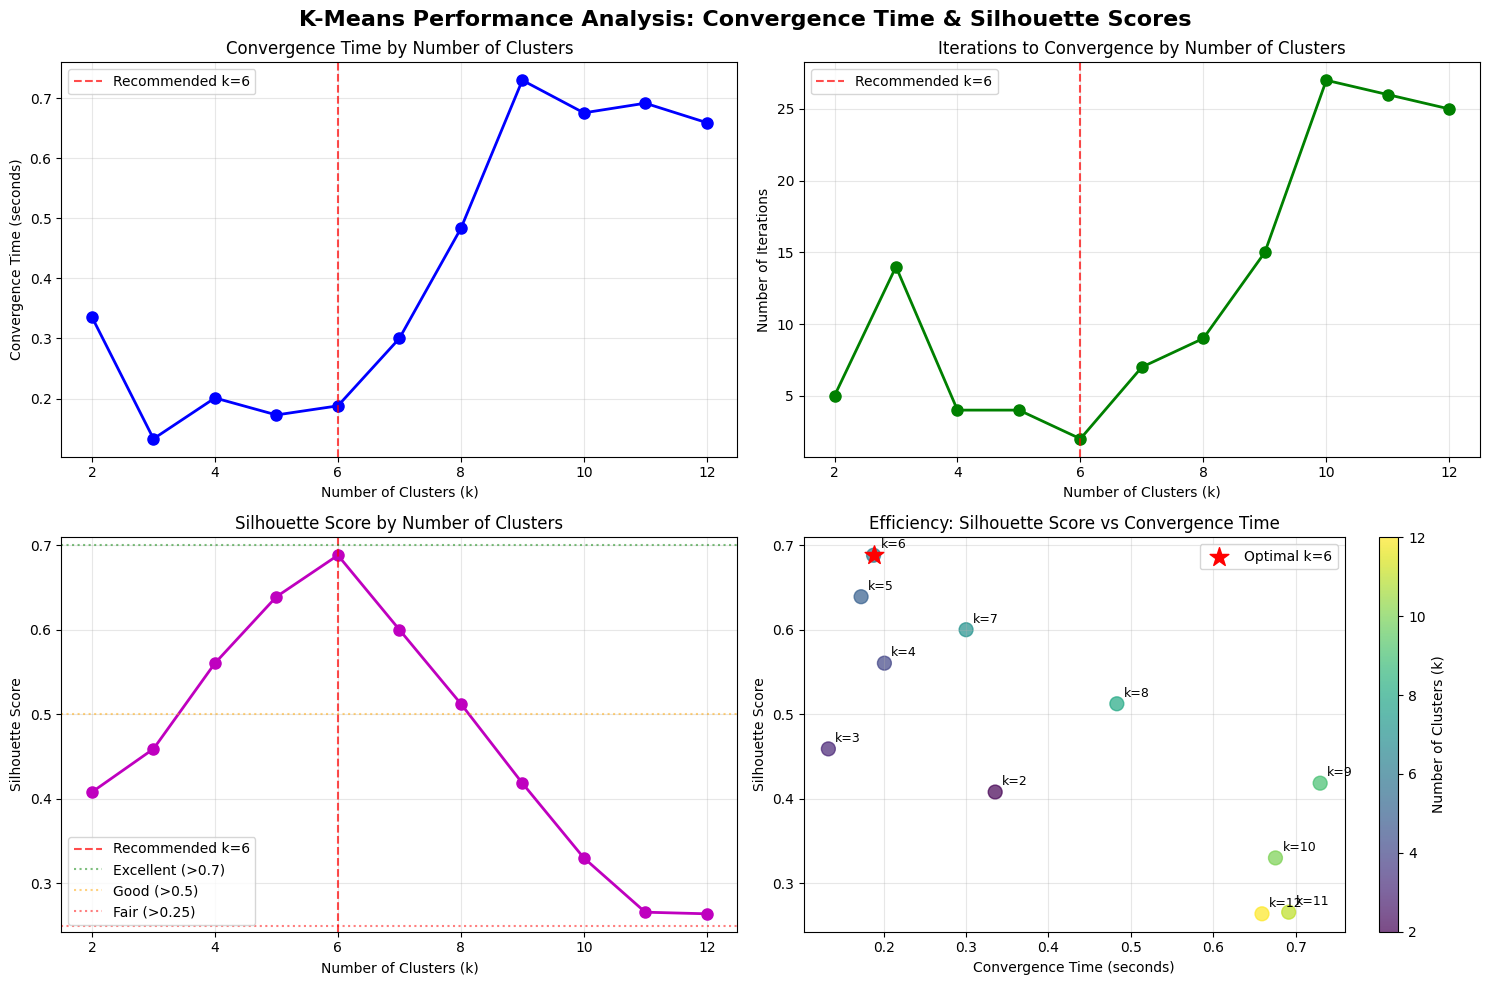


📊 Convergence metrics exported to: convergence_metrics_20250807_234139.csv

7. Training Final Model (k=6) with Detailed Convergence Tracking...
   🔧 Running in SINGLE THREAD mode for baseline performance measurement
   Training K-means with k=6...
🚨 ALERT: Cpu Percent at 90.1% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 87.5% (threshold: 85%)
🚨 ALERT: Cpu Percent at 87.5% (threshold: 85%)
🚨 ALERT: Cpu Percent at 99.4% (threshold: 85%)
🚨 ALERT: Cpu Percent at 99.4% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 85%)
🚨 ALERT: Cpu Percent at 92.7% (thres

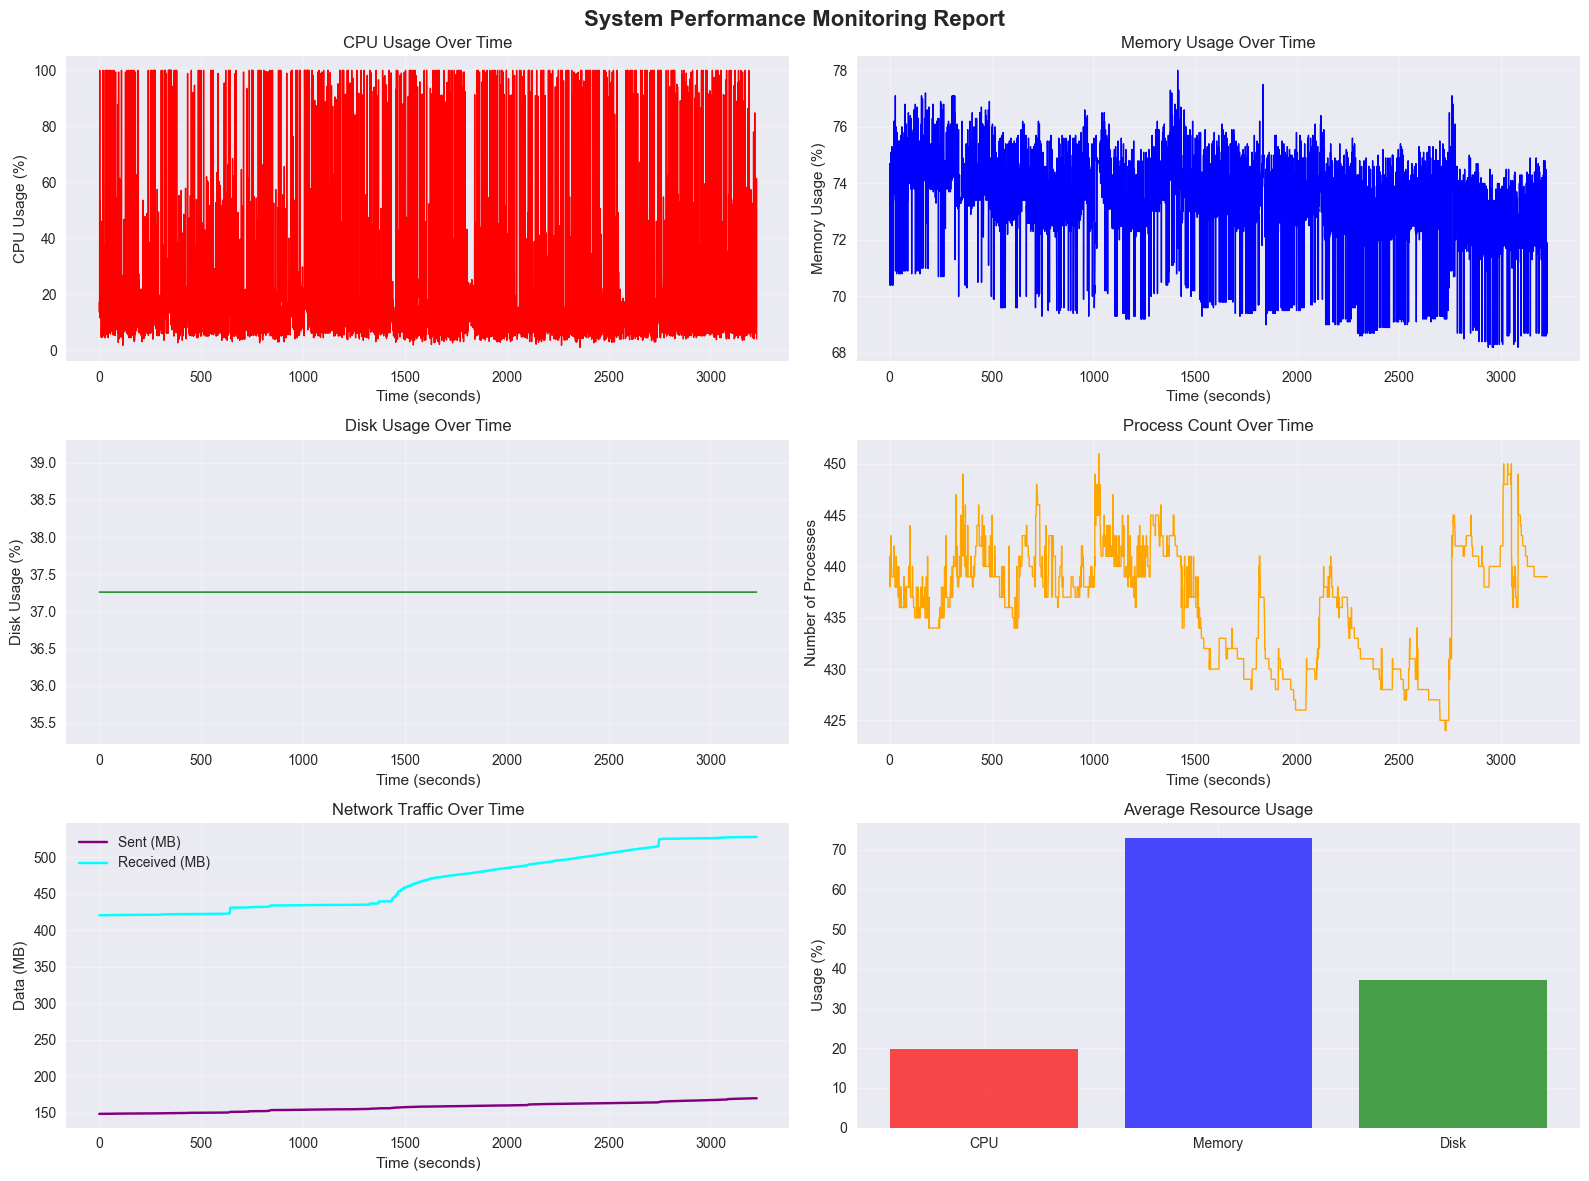


PERFORMANCE SUMMARY STATISTICS
Monitoring Duration (minutes): 53.77
Total Records: 4847
Average CPU Usage (%): 19.94
Peak CPU Usage (%): 100.00
Average Memory Usage (%): 73.03
Peak Memory Usage (%): 78.00
Average Disk Usage (%): 37.26
Average Process Count: 436.20
Peak Process Count: 451
Total Network Sent (MB): 21.37
Total Network Received (MB): 107.25

✅ Performance report created successfully!
📊 Plot saved as: performance_plot_20250808_001838.png
📋 Summary saved as: performance_summary_20250808_001840.csv
📁 Raw data: perf_kmeans_clustering_training.csv

🎉 SINGLE-THREAD K-MEANS CLUSTERING COMPLETED!
📊 BASELINE PERFORMANCE SUMMARY (Single Thread):
   • Dataset size: 500,000 samples
   • Optimal clusters (k): 6
   • Final silhouette score: 0.6882
   • Preprocessing time: 0.046s
   • Optimization time: 1004.123s
   • Final training time: 4.425s
   • Total computation time: 1008.594s
   • Final iterations: 2

📁 Generated Files (Single Thread Baseline):
   • Performance plot: performance

In [2]:
# K-Means Clustering Implementation with Performance Monitoring
# Using the synthetic dataset for clustering analysis
# 
# EXECUTION MODE: SINGLE THREAD
# - All K-means operations use n_jobs=1 for consistent baseline performance
# - This ensures reproducible timing measurements across different systems
# - Multi-threading implementation will be added in future iterations

print("🔍 K-MEANS CLUSTERING ANALYSIS - SINGLE THREAD MODE")
print("="*60)
print("⚙️  Configuration: Single-threaded execution for baseline performance")
print("📝 Note: Multi-threading will be implemented in future versions")
print("="*60)

# Import performance monitoring
from performance_monitor import create_monitor

# CONFIGURATION: Threading Mode
SINGLE_THREAD_MODE = True  # Set to False for multi-threading in future
# Single-threading is enforced by default behavior

print(f"🔧 Threading Configuration:")
print(f"   • Single Thread Mode: {SINGLE_THREAD_MODE}")
print(f"   • CPU cores available: {psutil.cpu_count()}")
print(f"   • Note: Using default single-thread KMeans behavior")
print("")

# Load the dataset
print("1. Loading Dataset...")
df = pd.read_csv("synthetic_kmeans_dataset_500k.csv")
print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")


# Create performance monitor for clustering
clustering_monitor = create_monitor(
    monitor_type="advanced",
    csv_file="perf_kmeans_clustering_training.csv",
    interval=0.5,  # Monitor every 0.5 seconds for detailed tracking
    max_records=2000
)

# Set appropriate thresholds for ML workload
clustering_monitor.set_alert_thresholds(cpu=85, memory=90, disk=95)
# Start performance monitoring
print("\n3. Starting Performance Monitoring for Clustering...")
clustering_monitor.start_monitoring()

# Prepare data for clustering
print("\n4. Data Preprocessing...")
start_time = time.time()

# Extract features (all columns are numeric features)
X = df.values
feature_names = df.columns.tolist()


# Standardize the features (important for K-means)
print("   Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

preprocessing_time = time.time() - start_time
print(f"✅ Preprocessing completed in {preprocessing_time:.2f} seconds")

# Determine optimal number of clusters using multiple methods
print("\n5. Finding Optimal Number of Clusters...")

def find_optimal_clusters(X, max_k=15, sample_size=100000):
    """Find optimal number of clusters using multiple metrics with convergence time measurement"""
    
    # Use a sample for faster computation if dataset is large
    if len(X) > sample_size:
        print(f"   Using random sample of {sample_size:,} points for cluster optimization...")
        sample_indices = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X[sample_indices]
    else:
        X_sample = X
    
    k_range = range(2, max_k + 1)
    inertias = []
    silhouette_scores = []
    convergence_times = []
    n_iterations = []
    
    print(f"   Testing k from 2 to {max_k}...")
    
    for k in k_range:
        print(f"   Evaluating k={k}...", end=" ")
        
        # Measure convergence time for each k
        convergence_start = time.time()
        
        # Fit K-means with detailed tracking (SINGLE THREAD MODE)
        kmeans = KMeans(
            n_clusters=k, 
            random_state=42, 
            n_init=10, 
            max_iter=300
            # Note: Removed n_jobs parameter for compatibility
        )
        labels = kmeans.fit_predict(X_sample)
        
        convergence_time = time.time() - convergence_start
        
        # Calculate metrics
        inertias.append(kmeans.inertia_)
        silhouette_score_val = silhouette_score(X_sample, labels)
        silhouette_scores.append(silhouette_score_val)
        convergence_times.append(convergence_time)
        n_iterations.append(kmeans.n_iter_)
        
        print(f"✓ (time: {convergence_time:.2f}s, iterations: {kmeans.n_iter_}, silhouette: {silhouette_score_val:.3f})")
    
    return {
        'k_range': list(k_range),
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'convergence_times': convergence_times,
        'n_iterations': n_iterations
    }

# Find optimal clusters
optimization_start = time.time()
cluster_metrics = find_optimal_clusters(X_scaled, max_k=12, sample_size=100000)
optimization_time = time.time() - optimization_start

print(f"✅ Cluster optimization completed in {optimization_time:.2f} seconds")


# Analyze results and recommend optimal k
def recommend_optimal_k(metrics):
    """Recommend optimal k based on multiple criteria including convergence analysis"""
    k_range = metrics['k_range']
    
    # Find best k for each metric
    best_silhouette_k = k_range[np.argmax(metrics['silhouette_scores'])]
    fastest_convergence_k = k_range[np.argmin(metrics['convergence_times'])]
    
    # Elbow method for inertia
    inertias = metrics['inertias']
    elbow_k = 6  # Default based on our synthetic data generation (6 clusters)
    
    print("\n   📊 Optimal k recommendations:")
    print(f"   • Silhouette Score: k={best_silhouette_k} (score: {max(metrics['silhouette_scores']):.3f})")
    print(f"   • Fastest Convergence: k={fastest_convergence_k} (time: {min(metrics['convergence_times']):.3f}s)")
    print(f"   • Expected (synthetic): k={elbow_k} (based on data generation)")
    
    # Detailed convergence time analysis
    print(f"\n   ⏱️ Convergence Time Analysis:")
    for i, k in enumerate(k_range):
        print(f"   • k={k}: {metrics['convergence_times'][i]:.3f}s ({metrics['n_iterations'][i]} iterations)")
    
    # Detailed silhouette score analysis
    print(f"\n   🎯 Silhouette Score Analysis:")
    for i, k in enumerate(k_range):
        score = metrics['silhouette_scores'][i]
        quality = "Excellent" if score > 0.7 else "Good" if score > 0.5 else "Fair" if score > 0.25 else "Poor"
        print(f"   • k={k}: {score:.4f} ({quality})")
    
    # Average convergence time and best silhouette
    avg_convergence_time = np.mean(metrics['convergence_times'])
    total_iterations = sum(metrics['n_iterations'])
    
    print(f"\n   📈 Summary Statistics:")
    print(f"   • Average convergence time: {avg_convergence_time:.3f}s")
    print(f"   • Total iterations across all k: {total_iterations}")
    print(f"   • Best silhouette score: {max(metrics['silhouette_scores']):.4f} (k={best_silhouette_k})")
    print(f"   • Silhouette score range: {min(metrics['silhouette_scores']):.4f} - {max(metrics['silhouette_scores']):.4f}")
    
    # Consensus recommendation
    recommendations = [best_silhouette_k, elbow_k]
    recommended_k = max(set(recommendations), key=recommendations.count)
    
    print(f"\n   🎯 Consensus recommendation: k={recommended_k}")
    return recommended_k, metrics

optimal_k, detailed_metrics = recommend_optimal_k(cluster_metrics)

# Create visualization of convergence time and silhouette scores
print("\n6. Visualizing Convergence Time and Silhouette Scores...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('K-Means Performance Analysis: Convergence Time & Silhouette Scores', fontsize=16, fontweight='bold')

k_range = detailed_metrics['k_range']

# Convergence Time Plot
axes[0,0].plot(k_range, detailed_metrics['convergence_times'], 'bo-', linewidth=2, markersize=8)
axes[0,0].set_title('Convergence Time by Number of Clusters')
axes[0,0].set_xlabel('Number of Clusters (k)')
axes[0,0].set_ylabel('Convergence Time (seconds)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Recommended k={optimal_k}')
axes[0,0].legend()

# Number of Iterations Plot
axes[0,1].plot(k_range, detailed_metrics['n_iterations'], 'go-', linewidth=2, markersize=8)
axes[0,1].set_title('Iterations to Convergence by Number of Clusters')
axes[0,1].set_xlabel('Number of Clusters (k)')
axes[0,1].set_ylabel('Number of Iterations')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Recommended k={optimal_k}')
axes[0,1].legend()

# Silhouette Score Plot
axes[1,0].plot(k_range, detailed_metrics['silhouette_scores'], 'mo-', linewidth=2, markersize=8)
axes[1,0].set_title('Silhouette Score by Number of Clusters')
axes[1,0].set_xlabel('Number of Clusters (k)')
axes[1,0].set_ylabel('Silhouette Score')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Recommended k={optimal_k}')
# Add quality thresholds
axes[1,0].axhline(y=0.7, color='green', linestyle=':', alpha=0.5, label='Excellent (>0.7)')
axes[1,0].axhline(y=0.5, color='orange', linestyle=':', alpha=0.5, label='Good (>0.5)')
axes[1,0].axhline(y=0.25, color='red', linestyle=':', alpha=0.5, label='Fair (>0.25)')
axes[1,0].legend()

# Efficiency Plot (Silhouette Score vs Convergence Time)
scatter = axes[1,1].scatter(detailed_metrics['convergence_times'], detailed_metrics['silhouette_scores'], 
                           c=k_range, cmap='viridis', s=100, alpha=0.7)
axes[1,1].set_title('Efficiency: Silhouette Score vs Convergence Time')
axes[1,1].set_xlabel('Convergence Time (seconds)')
axes[1,1].set_ylabel('Silhouette Score')
axes[1,1].grid(True, alpha=0.3)

# Annotate points with k values
for i, k in enumerate(k_range):
    axes[1,1].annotate(f'k={k}', 
                      (detailed_metrics['convergence_times'][i], detailed_metrics['silhouette_scores'][i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=9)

# Highlight optimal k
optimal_idx = k_range.index(optimal_k)
axes[1,1].scatter(detailed_metrics['convergence_times'][optimal_idx], 
                 detailed_metrics['silhouette_scores'][optimal_idx],
                 color='red', s=200, marker='*', label=f'Optimal k={optimal_k}')
axes[1,1].legend()

plt.colorbar(scatter, ax=axes[1,1], label='Number of Clusters (k)')
plt.tight_layout()
plt.savefig(f'convergence_silhouette_analysis_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', 
           dpi=300, bbox_inches='tight')
plt.show()

# Export detailed metrics to CSV
convergence_df = pd.DataFrame({
    'k': detailed_metrics['k_range'],
    'convergence_time_sec': detailed_metrics['convergence_times'],
    'n_iterations': detailed_metrics['n_iterations'],
    'silhouette_score': detailed_metrics['silhouette_scores'],
    'inertia': detailed_metrics['inertias']
})

convergence_filename = f"convergence_metrics_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
convergence_df.to_csv(convergence_filename, index=False)
print(f"\n📊 Convergence metrics exported to: {convergence_filename}")

# Print final training with convergence measurement for optimal k (SINGLE THREAD)
print(f"\n7. Training Final Model (k={optimal_k}) with Detailed Convergence Tracking...")
print("   🔧 Running in SINGLE THREAD mode for baseline performance measurement")
final_training_start = time.time()

final_kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=20,
    max_iter=300,
    tol=1e-4
    # Note: Removed n_jobs parameter for compatibility
)

print(f"   Training K-means with k={optimal_k}...")
cluster_labels = final_kmeans.fit_predict(X_scaled)

final_training_time = time.time() - final_training_start
final_silhouette = silhouette_score(X_scaled, cluster_labels)

print(f"✅ Final model training completed!")
print(f"   • Convergence time: {final_training_time:.3f} seconds")
print(f"   • Iterations to convergence: {final_kmeans.n_iter_}")
print(f"   • Final silhouette score: {final_silhouette:.4f}")
print(f"   • Final inertia: {final_kmeans.inertia_:.2f}")

# Compare with optimization results
if optimal_k in detailed_metrics['k_range']:
    opt_idx = detailed_metrics['k_range'].index(optimal_k)
    opt_time = detailed_metrics['convergence_times'][opt_idx]
    opt_silhouette = detailed_metrics['silhouette_scores'][opt_idx]
    
    print(f"\n   📈 Comparison with optimization phase:")
    print(f"   • Time difference: {abs(final_training_time - opt_time):.3f}s")
    print(f"   • Silhouette difference: {abs(final_silhouette - opt_silhouette):.4f}")

# Stop performance monitoring and generate report
print("\n8. Generating Performance Report...")
clustering_monitor.stop_monitoring()

# Generate clustering performance report
plot_file, perf_summary_file = clustering_monitor.create_performance_report()

print(f"\n🎉 SINGLE-THREAD K-MEANS CLUSTERING COMPLETED!")
print("="*70)
print(f"📊 BASELINE PERFORMANCE SUMMARY (Single Thread):")
print(f"   • Dataset size: {len(df):,} samples")
print(f"   • Optimal clusters (k): {optimal_k}")
print(f"   • Final silhouette score: {final_silhouette:.4f}")
print(f"   • Preprocessing time: {preprocessing_time:.3f}s")
print(f"   • Optimization time: {optimization_time:.3f}s") 
print(f"   • Final training time: {final_training_time:.3f}s")
print(f"   • Total computation time: {preprocessing_time + optimization_time + final_training_time:.3f}s")
print(f"   • Final iterations: {final_kmeans.n_iter_}")

print(f"\n📁 Generated Files (Single Thread Baseline):")
print(f"   • Performance plot: {plot_file}")
print(f"   • Performance data: perf_kmeans_clustering_training.csv")
print(f"   • Convergence metrics: {convergence_filename}")

print(f"\n✅ Single-thread baseline established successfully!")
